In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
%cd drive/My\ Drive
#ls
# import os
# os.chdir('dve/My\ Drive/blood-cell)

/content/drive/My Drive


In [0]:
#!unzip -uq '/content/drive/My Drive/1.zip' -d '/content/drive/My Drive/1/'

In [0]:
%cd ..

/content/drive/My Drive


In [0]:
!ls

test  train  valid


In [0]:
#!unzip 'train.zip' 'train/2/*'

In [0]:
# from PIL import Image
# import glob

# files = glob.glob('/content/drive/My Drive/blood-cell/train/c0/*')
# for each in files:
#     im = Image.open(each)
#     name = each.split('/')[-1]
      
#     fname = '/content/drive/My Drive/cell-images/c0/' + str(name)
# #    im1.save(fname, 'PNG')
#     newsize = (224,32)
#     im1 = im.resize(newsize)
#     im1.save(fname, 'PNG')

In [0]:
#Imports
from fastai import *
from fastai.vision import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy as sp
from functools import partial
from sklearn import metrics
from collections import Counter
from fastai.callbacks import *
import PIL
import cv2
import sklearn
import skimage
bs = 64

In [0]:
#images_path
path_images = Path('blood-cell')

In [0]:
#%cd ../../

/content/drive/My Drive


In [0]:
#!ls

0  1  2


In [0]:
# import os
# os.rename('1 (1)', '1')

In [0]:
#data path and init

#tfms = get_transforms(do_flip=True, )


data = ImageDataBunch.from_folder(path=path_images, train='train', valid='valid', bs=bs, classes=['0','1','2']) 
data.normalize()

#learner


ImageDataBunch;

Train: LabelList (36747 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
2,2,2,2,2
Path: cnrs;

Valid: LabelList (8836 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
2,2,2,2,2
Path: cnrs;

Test: None

In [0]:
data.classes

['0', '1', '2']

In [0]:
learn = create_cnn(data, models.densenet161, metrics=error_rate)
learn.freeze()

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-05
Min loss divided by 10: 6.92E-03


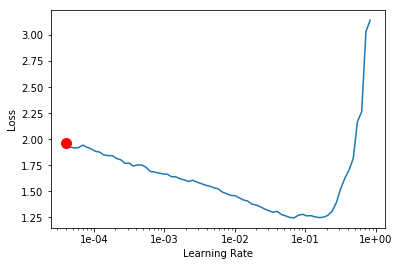

In [0]:
# learn.freeze()
learn.lr_find(start_lr=1e-5, end_lr=1e1, wd=5e-3)
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,time
0,0.209744,0.267313,0.115211,1:58:01


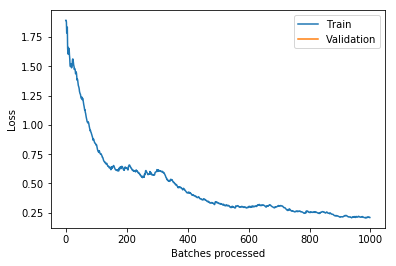

In [0]:
learn.fit_one_cycle(1, max_lr=slice(4e-4, 2e-2))
learn.save('bc-stage1')
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,error_rate,time
0,0.338290,0.281290,0.112268,10:01
1,0.249523,0.283778,0.101403,05:01
2,0.228068,0.548131,0.187528,04:56
3,0.193305,0.719699,0.112947,04:58
4,0.158587,10.167318,0.095292,05:01
5,0.112859,0.409781,0.101177,04:59
6,0.099866,2.762318,0.102875,04:56
7,0.053121,0.410175,0.099932,04:59
8,0.037695,0.562317,0.102535,04:59
9,0.029860,0.506727,0.102082,05:00


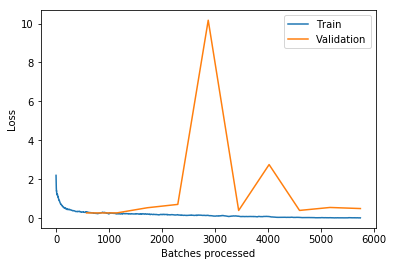

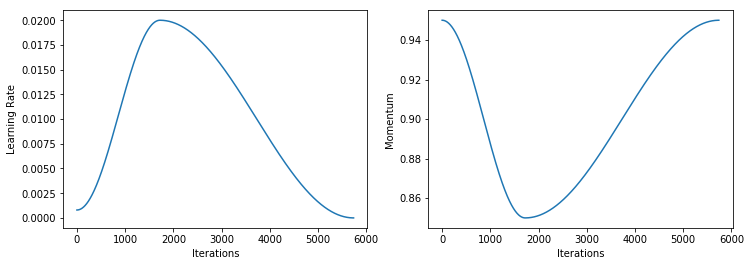

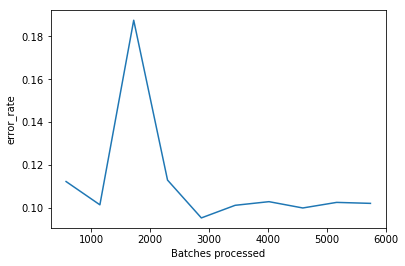

In [0]:
learn.fit_one_cycle(10, max_lr=slice(4e-4, 2e-2))
learn.save('bc-stage2')
learn.recorder.plot_losses()
# # schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [0]:
learn.load('bc-stage2')
interp = ClassificationInterpretation.from_learner(learn)

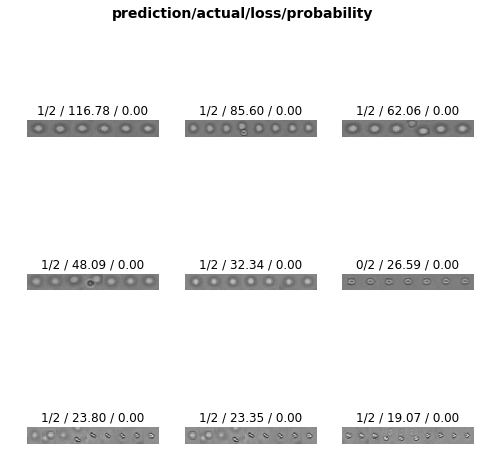

In [0]:
interp.plot_top_losses(9, figsize=(8,8))

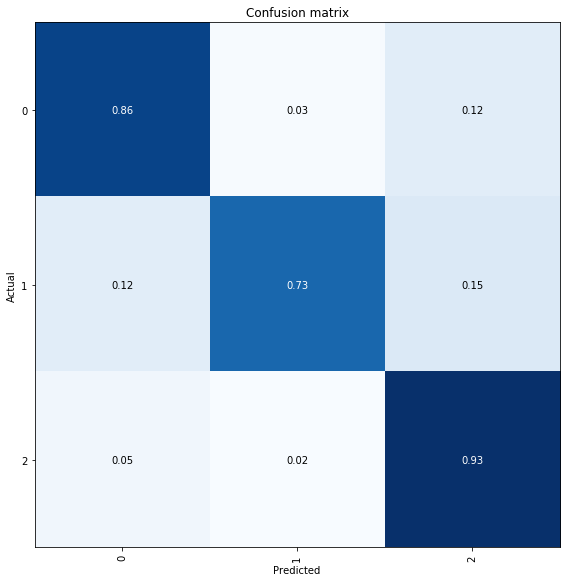

In [0]:
interp.plot_confusion_matrix(normalize=True, figsize=(8,8))

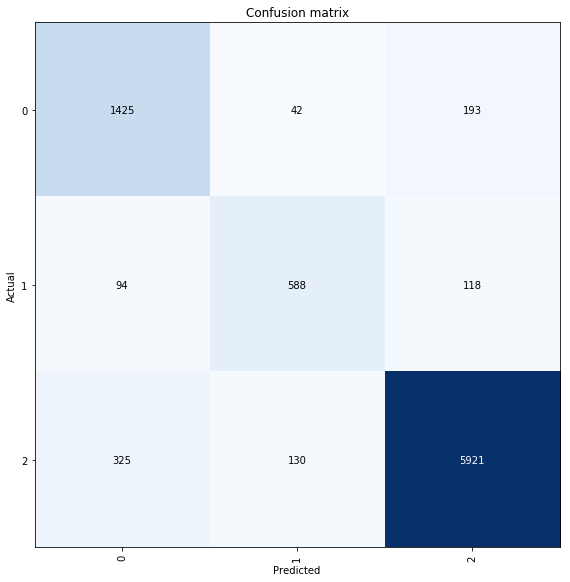

In [0]:
interp.plot_confusion_matrix(figsize=(8,8))

In [0]:
learn.export('bc-stage2.pkl')

In [0]:
"""Testing"""

# path_images = Path('cnrs')

data = ImageDataBunch.from_folder(path=path_images, train='train', valid='test', bs=bs, classes=['0','1','2']) 
data.normalize()

ImageDataBunch;

Train: LabelList (36747 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
2,2,2,2,2
Path: cnrs;

Valid: LabelList (8383 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
2,2,2,2,2
Path: cnrs;

Test: None

In [0]:
`learn = cnn_learner(data, models.densenet161, metrics=error_rate)

In [0]:
learn = learn.load('bc-stage2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

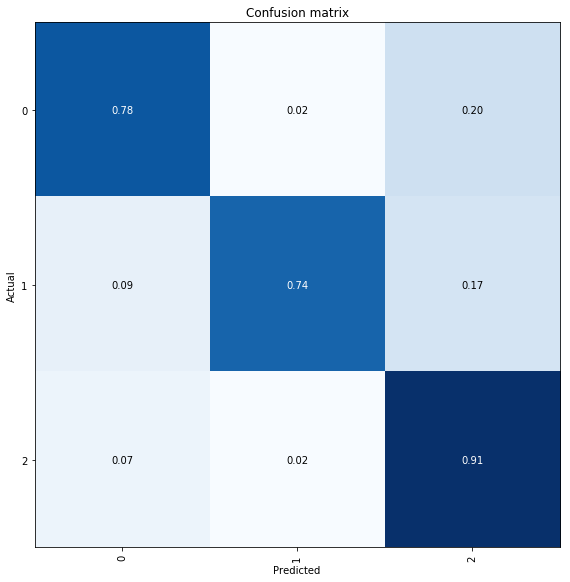

In [0]:
interp.plot_confusion_matrix(normalize=True, figsize=(8,8))

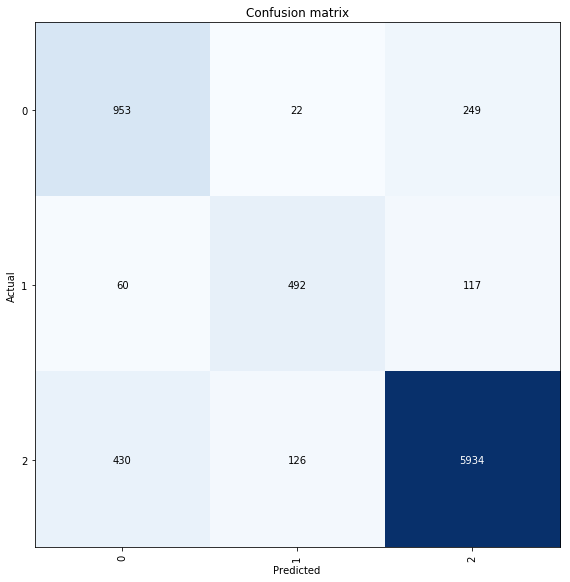

In [0]:
interp.plot_confusion_matrix(figsize=(8,8))

In [0]:
import glob

image_list = glob.glob('cnrs/test/*/*')

C0 = 0
Pred_C0=0
C1=0
Pred_C1=0
C2=0
Pred_C2=0

for each in image_list:
    img = open_image(each)
    each = each.split('/')
    bc_class = each[2]
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = str(pred_class)
         
    if bc_class == '0':
        C0 += 1
        if pred_class == '0':
            Pred_C0 += 1
    elif bc_class == '1':
        C1 += 1
        if pred_class == '1':
            Pred_C1 += 1
    elif bc_class == '2':
        C2 += 1
        if pred_class == '2':
            Pred_C2 += 1
            
    
print('C0 classification: ' + str(Pred_C0) + '/' + str(C0))
print('C1 classification: ' + str(Pred_C1) + '/' + str(C1))
print('C2 classification: ' + str(Pred_C2) + '/' + str(C2) )

C0 classification: 953/1224
C1 classification: 492/669
C2 classification: 5934/6490
